**Regularization**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

dataset = datasets.load_boston()

c:\Users\USER\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [10]:
rand_state = 1234

In [11]:
x = dataset['data'][:, [12]]
y = dataset['target']

errors_train = OrderedDict()
errors_val = OrderedDict()
poly = OrderedDict()
models = OrderedDict()
for deg in range(1, 13):
    model_name = 'poly' + str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg, include_bias=False)

    # Cross-validation
    errors_train[model_name] = []
    errors_val[model_name] = []

    kf = KFold(n_splits=5, shuffle=True, random_state=rand_state)

    for train_index, val_index in kf.split(x):
    
        # Split the data
        x_train, x_val = x[train_index], x[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Preprocess the data
        x_train_poly = poly[model_name].fit_transform(x_train)
        x_val_poly = poly[model_name].transform(x_val)
        
        # Init a linear model
        # Change from normal to Ridge Regression
        model = linear_model.Ridge(alpha=0.001, normalize=True)
        # Train the model
        model.fit(x_train_poly, y_train)

        models[model_name] = model

        # Evaluate on the training set
        y_train_pred = model.predict(x_train_poly)
        mse = mean_squared_error(y_train, y_train_pred)
        errors_train[model_name].append(mse)

        # Evaluate on the validation set
        y_val_pred = model.predict(x_val_poly)
        mse = mean_squared_error(y_val, y_val_pred)
        errors_val[model_name].append(mse)

c:\Users\USER\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\USER\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Text(0, 0.5, 'MSE Average')

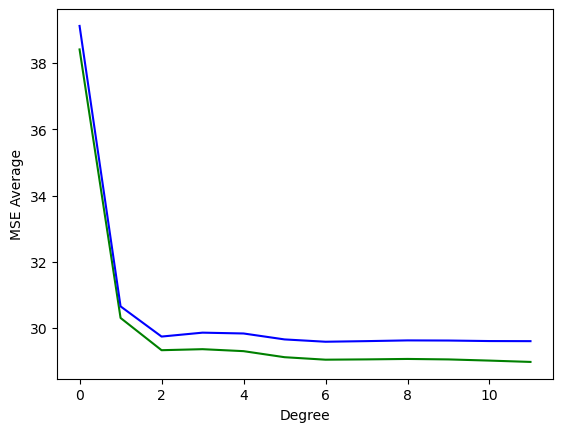

In [12]:
# Plot the training error mean and the validation error mean
mse_means_train = []
for model_name, errors in errors_train.items():
    mse_means_train += [np.mean(errors)]

mse_means_val = []
for model_name, errors in errors_val.items():
    mse_means_val += [np.mean(errors)]

_ = plt.plot(mse_means_train, c='g')
_ = plt.plot(mse_means_val, c='b')

plt.xlabel('Degree')
plt.ylabel('MSE Average')

Text(0, 0.5, 'Price')

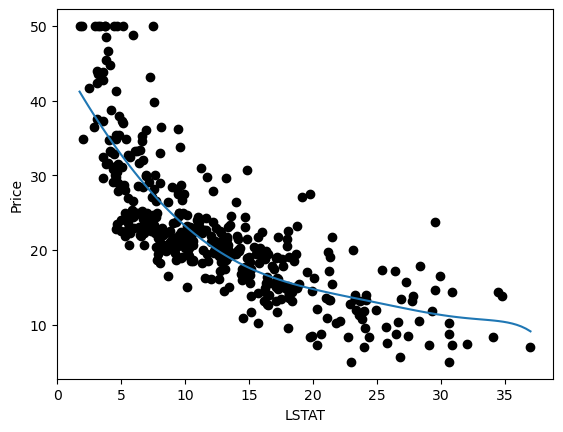

In [13]:
# The 12th degree polynomial model
model_name = 'poly12'
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='black')
x_model = np.linspace(start=min(x_train), stop=max(x_train), num=100).reshape([100, 1])
ax.plot(x_model.flatten(), models[model_name].predict(poly[model_name].transform(x_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

# The model does not overfit at region with low amount of data anymore


**Investigate the learned weights of all the models**

In [14]:
import pandas as pd

In [ ]:
coefs = []
model_names = ['poly' + str(deg) for deg in range(1, 13)]
for model_name in model_names:
    coefs += [models[model_name].coef_]

df_coefs = pd.DataFrame(coefs).transpose()
df_coefs.columns = model_names
df_coefs

# Can be seen that most feature has weight that is very close to 0

,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,poly10,poly11,poly12
0,-0.963511,-2.319713,-3.043309,-2.978417,-2.971777e+00,-3.047786e+00,-3.080051e+00,-3.076685e+00,-3.074142e+00,-3.085060e+00,-3.104676e+00,-3.124487e+00
1,NaN,0.042897,0.094503,0.072656,7.212805e-02,7.479888e-02,7.369540e-02,7.202390e-02,7.173360e-02,7.254147e-02,7.357391e-02,7.425422e-02
2,NaN,NaN,-0.001021,0.000432,4.269918e-04,6.268583e-04,7.826546e-04,8.237334e-04,8.239620e-04,8.359102e-04,8.687586e-04,9.112153e-04
3,NaN,NaN,NaN,-0.000026,-2.505796e-05,-2.648163e-05,-2.139960e-05,-1.805026e-05,-1.765446e-05,-1.839242e-05,-1.882919e-05,-1.853438e-05
4,NaN,NaN,NaN,NaN,-2.834810e-08,-6.559947e-07,-7.802341e-07,-7.252183e-07,-7.108955e-07,-7.551220e-07,-8.154611e-07,-8.595007e-07
5,NaN,NaN,NaN,NaN,NaN,1.411451e-08,-5.340932e-09,-8.690632e-09,-8.614324e-09,-9.665495e-09,-1.190682e-08,-1.431982e-08
6,NaN,NaN,NaN,NaN,NaN,NaN,4.728644e-10,1.446896e-10,1.250555e-10,1.328950e-10,9.648818e-11,2.869618e-11
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.650524e-12,7.194313e-12,9.326328e-12,1.037116e-11,9.730025e-12
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.188180e-14,1.743139e-13,2.946595e-13,3.477323e-13
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.146884e-15,2.477503e-15,6.801131e-15
